# AirBNB Paris Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datasets/Airbnb Data/Listings.csv")

c:\users\aditb\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.isnull().sum()

listing_id                          0
name                              173
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

too many values in district are NAN/Null, so lets drop this column

In [4]:
df1 = df.drop(labels = ['district','host_response_time', 'host_acceptance_rate', 'host_response_rate'], axis = 1)

In [5]:
df1.head()

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",f,1.0,t,f,Buttes-Montmartre,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,2013-11-29,"Paris, Ile-de-France, France",f,1.0,t,t,Buttes-Montmartre,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",f,1.0,t,f,Elysee,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",f,1.0,t,t,Vaugirard,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",f,1.0,t,f,Passy,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
df1 = df1.dropna()

In [7]:
df1.isnull().sum()

listing_id                     0
name                           0
host_id                        0
host_since                     0
host_location                  0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64

In [8]:
df1['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney', 'Rome',
       'Hong Kong', 'Istanbul', 'Mexico City', 'Cape Town'], dtype=object)

In [9]:
df1[df1['host_location'] == 'Turkey']['city'].unique()

array(['Istanbul'], dtype=object)

In [10]:
df1[df1['host_location'] == 'France']['city'].unique()

array(['Paris', 'Sydney', 'Hong Kong', 'Cape Town', 'New York',
       'Mexico City', 'Bangkok'], dtype=object)

In [11]:
df1[df1['host_location'] == 'Australia']['city'].unique()

array(['New York', 'Sydney', 'Paris', 'Rio de Janeiro', 'Istanbul',
       'Bangkok', 'Cape Town', 'Hong Kong'], dtype=object)

there does seem to be some inconsistent data over here. Apart from Paris, none of the othe cities present in the above snippet of code are located in France. Thus we might have to ignore the 'host_location' column or we may drop it later

### Getting Paris data

Now dividing the data city wise

In [12]:
dPar = df1[df1['city'] == 'Paris']

In [13]:
dPar.head()

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",f,1.0,t,f,Buttes-Montmartre,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,2013-11-29,"Paris, Ile-de-France, France",f,1.0,t,t,Buttes-Montmartre,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",f,1.0,t,f,Elysee,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",f,1.0,t,t,Vaugirard,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",f,1.0,t,f,Passy,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [14]:
dPar.describe()

,listing_id,host_id,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3.790700e+04,3.790700e+04,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000
mean,2.212850e+07,7.755925e+07,9.718179,48.864375,2.346847,3.276677,1.359986,117.339040,5.310866,680.081120,93.468093,9.615849,9.249110,9.702641,9.727201,9.688685,9.314981
std,1.365652e+07,9.630605e+07,63.292557,0.018311,0.032353,1.686444,0.960789,207.107303,55.621490,890.529995,8.498578,0.818777,1.067211,0.745272,0.738441,0.690996,0.903704
min,2.577000e+03,2.626000e+03,0.000000,48.815700,2.238380,1.000000,1.000000,8.000000,1.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,9.762488e+06,1.022919e+07,1.000000,48.851130,2.326885,2.000000,1.000000,60.000000,2.000000,30.000000,91.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.175014e+07,3.240280e+07,1.000000,48.865770,2.349340,3.000000,1.000000,88.000000,2.000000,1125.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,3.437806e+07,1.083232e+08,2.000000,48.879300,2.371300,4.000000,2.000000,125.000000,4.000000,1125.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.807656e+07,3.868271e+08,1105.000000,48.901290,2.467050,16.000000,50.000000,12000.000000,9999.000000,99999.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [15]:
dPar.host_location.unique().shape

(1407,)

In [16]:
dPar.neighbourhood.unique()

array(['Buttes-Montmartre', 'Elysee', 'Vaugirard', 'Passy', 'Temple',
       'Popincourt', 'Buttes-Chaumont', 'Opera', 'Gobelins',
       'Hotel-de-Ville', 'Pantheon', 'Enclos-St-Laurent',
       'Batignolles-Monceau', 'Luxembourg', 'Reuilly', 'Menilmontant',
       'Observatoire', 'Palais-Bourbon', 'Bourse', 'Louvre'], dtype=object)

Sorting basis the highest number of AirBNB hosts

In [17]:
nei_stats = dPar.groupby('neighbourhood')['neighbourhood'].agg('count').sort_values(ascending = False)
nei_stats

neighbourhood
Buttes-Montmartre      4404
Popincourt             3785
Enclos-St-Laurent      2924
Vaugirard              2688
Batignolles-Monceau    2361
Buttes-Chaumont        2270
Menilmontant           2244
Opera                  1875
Temple                 1827
Reuilly                1591
Passy                  1533
Observatoire           1448
Gobelins               1386
Bourse                 1293
Pantheon               1256
Hotel-de-Ville         1166
Luxembourg             1148
Palais-Bourbon          962
Elysee                  944
Louvre                  802
Name: neighbourhood, dtype: int64

In [18]:
l = []
for i in nei_stats.index:
    l.append(i)
l

['Buttes-Montmartre',
 'Popincourt',
 'Enclos-St-Laurent',
 'Vaugirard',
 'Batignolles-Monceau',
 'Buttes-Chaumont',
 'Menilmontant',
 'Opera',
 'Temple',
 'Reuilly',
 'Passy',
 'Observatoire',
 'Gobelins',
 'Bourse',
 'Pantheon',
 'Hotel-de-Ville',
 'Luxembourg',
 'Palais-Bourbon',
 'Elysee',
 'Louvre']

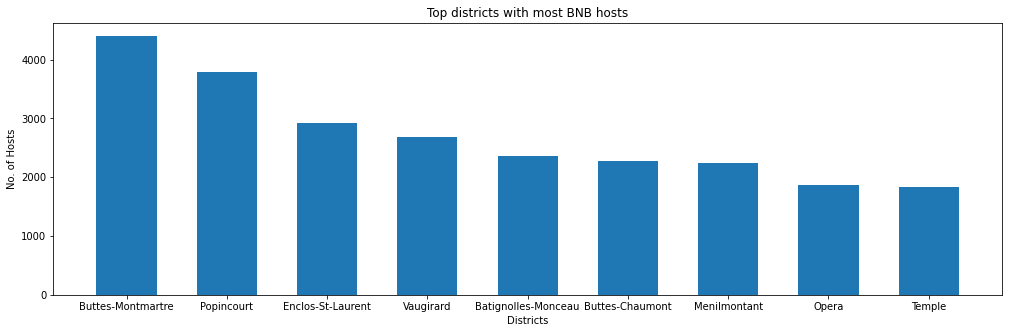

In [19]:
fig = plt.figure(figsize = (17, 5))
plt.xlabel('Districts')
plt.ylabel('No. of Hosts')
plt.title('Top districts with most BNB hosts')
plt.bar(l[:9], nei_stats[:9], width = 0.6)
plt.show()

## Average ratings of the BNBs' Distirict wise 

In [20]:
dict = {}
for i in l:
    dict[i] = 0

for i in dPar.index:
    dict[dPar['neighbourhood'][i]] += dPar['review_scores_rating'][i]
dict

{'Buttes-Montmartre': 412570.0,
 'Popincourt': 355760.0,
 'Enclos-St-Laurent': 274428.0,
 'Vaugirard': 251830.0,
 'Batignolles-Monceau': 220224.0,
 'Buttes-Chaumont': 211545.0,
 'Menilmontant': 210162.0,
 'Opera': 175419.0,
 'Temple': 170189.0,
 'Reuilly': 149055.0,
 'Passy': 142400.0,
 'Observatoire': 135072.0,
 'Gobelins': 129070.0,
 'Bourse': 119463.0,
 'Pantheon': 117269.0,
 'Hotel-de-Ville': 109461.0,
 'Luxembourg': 106734.0,
 'Palais-Bourbon': 90209.0,
 'Elysee': 87198.0,
 'Louvre': 75037.0}

In [21]:
k = 0
for i in dict:
    dict[i] = dict[i]/(nei_stats[k])
    k+=1
    
dict

{'Buttes-Montmartre': 93.68074477747503,
 'Popincourt': 93.99207397622193,
 'Enclos-St-Laurent': 93.85362517099863,
 'Vaugirard': 93.68675595238095,
 'Batignolles-Monceau': 93.27573062261753,
 'Buttes-Chaumont': 93.19162995594714,
 'Menilmontant': 93.65508021390374,
 'Opera': 93.5568,
 'Temple': 93.15216201423098,
 'Reuilly': 93.68636077938403,
 'Passy': 92.8897586431833,
 'Observatoire': 93.2817679558011,
 'Gobelins': 93.12409812409813,
 'Bourse': 92.39211136890951,
 'Pantheon': 93.36703821656052,
 'Hotel-de-Ville': 93.87735849056604,
 'Luxembourg': 92.97386759581882,
 'Palais-Bourbon': 93.77234927234927,
 'Elysee': 92.3707627118644,
 'Louvre': 93.56234413965088}

In [22]:
for i in dict:
    dict[i] = round(dict[i], 3)

In [23]:
dict

{'Buttes-Montmartre': 93.681,
 'Popincourt': 93.992,
 'Enclos-St-Laurent': 93.854,
 'Vaugirard': 93.687,
 'Batignolles-Monceau': 93.276,
 'Buttes-Chaumont': 93.192,
 'Menilmontant': 93.655,
 'Opera': 93.557,
 'Temple': 93.152,
 'Reuilly': 93.686,
 'Passy': 92.89,
 'Observatoire': 93.282,
 'Gobelins': 93.124,
 'Bourse': 92.392,
 'Pantheon': 93.367,
 'Hotel-de-Ville': 93.877,
 'Luxembourg': 92.974,
 'Palais-Bourbon': 93.772,
 'Elysee': 92.371,
 'Louvre': 93.562}

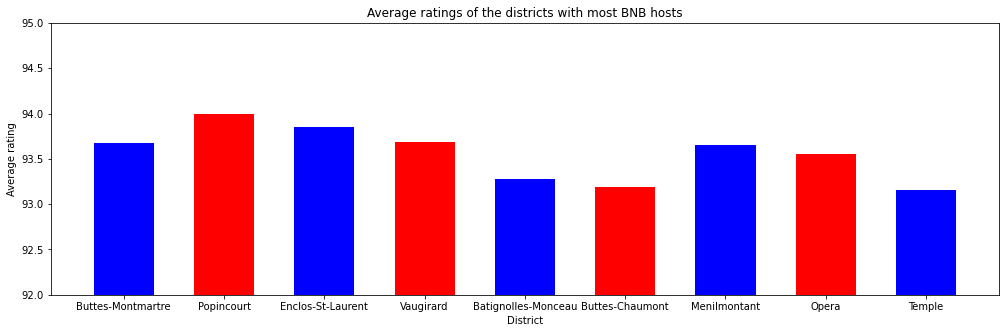

In [24]:
fig = plt.figure(figsize = (17, 5))
plt.ylim(92, 95)
plt.xlabel('District')
plt.ylabel('Average rating')
plt.title('Average ratings of the districts with most BNB hosts')
plt.bar(list(dict.keys())[:9], list(dict.values())[:9], width = 0.6, color = ['blue', 'red']*5)
plt.show()

## Top 10 districts based on Location

In [25]:
dict1 = {}
for i in l:
    dict1[i] = 0

for i in dPar.index:
    dict1[dPar['neighbourhood'][i]] += dPar['review_scores_location'][i]
dict1

{'Buttes-Montmartre': 41431.0,
 'Popincourt': 36918.0,
 'Enclos-St-Laurent': 28010.0,
 'Vaugirard': 26261.0,
 'Batignolles-Monceau': 22778.0,
 'Buttes-Chaumont': 21443.0,
 'Menilmontant': 21211.0,
 'Opera': 18409.0,
 'Temple': 18041.0,
 'Reuilly': 15422.0,
 'Passy': 14994.0,
 'Observatoire': 14066.0,
 'Gobelins': 13358.0,
 'Bourse': 12709.0,
 'Pantheon': 12458.0,
 'Hotel-de-Ville': 11605.0,
 'Luxembourg': 11379.0,
 'Palais-Bourbon': 9543.0,
 'Elysee': 9281.0,
 'Louvre': 7952.0}

In [26]:
k = 0
for i in dict1:
    dict1[i] = dict1[i]/(nei_stats[k])
    k+=1
    
dict1

{'Buttes-Montmartre': 9.407584014532244,
 'Popincourt': 9.753764861294584,
 'Enclos-St-Laurent': 9.579343365253077,
 'Vaugirard': 9.769717261904763,
 'Batignolles-Monceau': 9.647606946209233,
 'Buttes-Chaumont': 9.44625550660793,
 'Menilmontant': 9.452317290552585,
 'Opera': 9.818133333333334,
 'Temple': 9.874657909140668,
 'Reuilly': 9.693274670018855,
 'Passy': 9.780821917808218,
 'Observatoire': 9.714088397790055,
 'Gobelins': 9.637806637806637,
 'Bourse': 9.82907965970611,
 'Pantheon': 9.918789808917197,
 'Hotel-de-Ville': 9.952830188679245,
 'Luxembourg': 9.912020905923345,
 'Palais-Bourbon': 9.91995841995842,
 'Elysee': 9.83156779661017,
 'Louvre': 9.915211970074813}

In [27]:
sorted_dict = {}
sorted_keys = sorted(dict1, key = dict1.get)
sorted_keys

['Buttes-Montmartre',
 'Buttes-Chaumont',
 'Menilmontant',
 'Enclos-St-Laurent',
 'Gobelins',
 'Batignolles-Monceau',
 'Reuilly',
 'Observatoire',
 'Popincourt',
 'Vaugirard',
 'Passy',
 'Opera',
 'Bourse',
 'Elysee',
 'Temple',
 'Luxembourg',
 'Louvre',
 'Pantheon',
 'Palais-Bourbon',
 'Hotel-de-Ville']

In [28]:
for j in sorted_keys:
    sorted_dict[j] = dict1[j]
sorted_dict

{'Buttes-Montmartre': 9.407584014532244,
 'Buttes-Chaumont': 9.44625550660793,
 'Menilmontant': 9.452317290552585,
 'Enclos-St-Laurent': 9.579343365253077,
 'Gobelins': 9.637806637806637,
 'Batignolles-Monceau': 9.647606946209233,
 'Reuilly': 9.693274670018855,
 'Observatoire': 9.714088397790055,
 'Popincourt': 9.753764861294584,
 'Vaugirard': 9.769717261904763,
 'Passy': 9.780821917808218,
 'Opera': 9.818133333333334,
 'Bourse': 9.82907965970611,
 'Elysee': 9.83156779661017,
 'Temple': 9.874657909140668,
 'Luxembourg': 9.912020905923345,
 'Louvre': 9.915211970074813,
 'Pantheon': 9.918789808917197,
 'Palais-Bourbon': 9.91995841995842,
 'Hotel-de-Ville': 9.952830188679245}

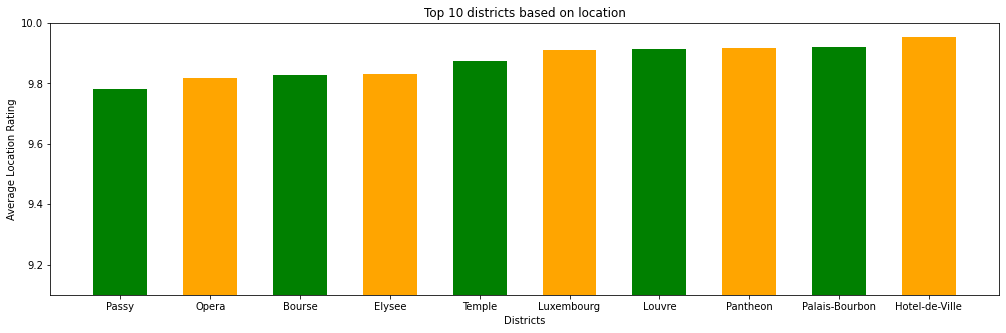

In [29]:
fig = plt.figure(figsize = (17, 5))
plt.ylim(9.1, 10)
plt.xlabel('Districts')
plt.ylabel('Average Location Rating')
plt.title('Top 10 districts based on location')
plt.bar(list(sorted_dict.keys())[-10:], list(sorted_dict.values())[-10:], width = 0.6, color = ['green', 'orange']*5)
plt.show()

## Types of BNB hosts

In [30]:
dPar.describe()

,listing_id,host_id,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3.790700e+04,3.790700e+04,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000
mean,2.212850e+07,7.755925e+07,9.718179,48.864375,2.346847,3.276677,1.359986,117.339040,5.310866,680.081120,93.468093,9.615849,9.249110,9.702641,9.727201,9.688685,9.314981
std,1.365652e+07,9.630605e+07,63.292557,0.018311,0.032353,1.686444,0.960789,207.107303,55.621490,890.529995,8.498578,0.818777,1.067211,0.745272,0.738441,0.690996,0.903704
min,2.577000e+03,2.626000e+03,0.000000,48.815700,2.238380,1.000000,1.000000,8.000000,1.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,9.762488e+06,1.022919e+07,1.000000,48.851130,2.326885,2.000000,1.000000,60.000000,2.000000,30.000000,91.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.175014e+07,3.240280e+07,1.000000,48.865770,2.349340,3.000000,1.000000,88.000000,2.000000,1125.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,3.437806e+07,1.083232e+08,2.000000,48.879300,2.371300,4.000000,2.000000,125.000000,4.000000,1125.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.807656e+07,3.868271e+08,1105.000000,48.901290,2.467050,16.000000,50.000000,12000.000000,9999.000000,99999.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [31]:
dPar['room_type'].unique()

array(['Entire place', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [32]:
room_stats = dPar.groupby('room_type')['room_type'].agg('count').sort_values(ascending = False)

In [33]:
room_stats

room_type
Entire place    31819
Private room     5023
Hotel room        806
Shared room       259
Name: room_type, dtype: int64

In [34]:
l = [i for i in room_stats.index]
l

['Entire place', 'Private room', 'Hotel room', 'Shared room']

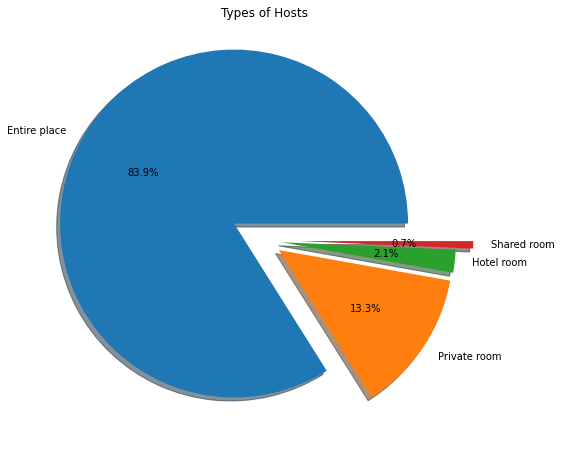

In [35]:
def func(x, room_stats):
    #pct = (x*100)/room_stats.sum()
    return "{:.1f}%".format(x)
    
fig = plt.figure(figsize = (8, 8))
plt.pie(room_stats,
        labels = l,
        autopct = lambda pct: func(pct, room_stats),
        explode = [0.2, 0.1, 0.1, 0.2],
        shadow = True)
plt.title('Types of Hosts')
plt.show()

## Factor importance of amenities for a good rating

there might be different amenities available at different BNB host locations. So lets see just the importance of 10 most commonly
found amenities

In [36]:
dPar.head()

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",f,1.0,t,f,Buttes-Montmartre,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,2013-11-29,"Paris, Ile-de-France, France",f,1.0,t,t,Buttes-Montmartre,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",f,1.0,t,f,Elysee,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",f,1.0,t,t,Vaugirard,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",f,1.0,t,f,Passy,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [37]:
amen = dPar['amenities'].unique()
amen

array(['["Heating", "Kitchen", "Washer", "Wifi", "Long term stays allowed"]',
       '["Shampoo", "Heating", "Kitchen", "Essentials", "Washer", "Dryer", "Wifi", "Long term stays allowed"]',
       '["Heating", "TV", "Kitchen", "Washer", "Wifi", "Long term stays allowed"]',
       ...,
       '["Paid parking off premises", "Shampoo", "First aid kit", "Heating", "Iron", "Kitchen", "Hair dryer", "Essentials", "Washer", "Breakfast", "Hot water", "Wifi", "Long term stays allowed", "Dedicated workspace", "Host greets you"]',
       '["TV", "Iron", "Kitchen", "Hangers", "Smoke alarm", "Cable TV", "Dedicated workspace", "Hot water", "Heating", "Shampoo", "Elevator", "Essentials", "Washer", "Carbon monoxide alarm", "Wifi"]',
       '["Shower gel", "Shampoo", "Iron", "Heating", "Washer", "Dedicated workspace", "Extra pillows and blankets", "Wifi", "Dishes and silverware", "Kitchen", "Refrigerator", "Cooking basics", "Hot water", "Essentials", "Bed linens", "Dishwasher", "Coffee maker"]'],
      

converting the string value to list

In [38]:
import ast
def Lis(x):
    arr = ast.literal_eval(x)
    return arr

Lis("['Hello']")

dPar['amen_as_list'] = dPar['amenities'].apply(Lis)

<ipython-input-38-96cf307da711>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dPar['amen_as_list'] = dPar['amenities'].apply(Lis)


In [39]:
dPar['amen_as_list']

0         [Heating, Kitchen, Washer, Wifi, Long term sta...
1         [Shampoo, Heating, Kitchen, Essentials, Washer...
2         [Heating, TV, Kitchen, Washer, Wifi, Long term...
3         [Heating, TV, Kitchen, Wifi, Long term stays a...
4         [Heating, TV, Kitchen, Essentials, Hair dryer,...
                                ...                        
279707    [Iron, Heating, Washer, Dedicated workspace, E...
279708    [Shampoo, Iron, Heating, Washer, Hair dryer, E...
279709    [Paid parking off premises, Shampoo, First aid...
279710    [TV, Iron, Kitchen, Hangers, Smoke alarm, Cabl...
279711    [Shower gel, Shampoo, Iron, Heating, Washer, D...
Name: amen_as_list, Length: 37907, dtype: object

Amenities most commonly found at Hosts' locations

In [40]:
amenities = {}

for i in dPar['amen_as_list'].index:
    for j in range(len(dPar['amen_as_list'][i])):
        if(dPar['amen_as_list'][i][j] not in amenities):
            amenities[(dPar['amen_as_list'][i][j])] = 1
        else:
            amenities[(dPar['amen_as_list'][i][j])] += 1
amenities

{'Heating': 36384,
 'Kitchen': 35470,
 'Washer': 30647,
 'Wifi': 36480,
 'Long term stays allowed': 30121,
 'Shampoo': 25085,
 'Essentials': 35834,
 'Dryer': 12416,
 'TV': 25344,
 'Hair dryer': 28427,
 'Bathtub': 3616,
 'Elevator': 14805,
 'Cable TV': 10043,
 'Smoke alarm': 28219,
 'Fire extinguisher': 5962,
 'Paid parking off premises': 9336,
 'Iron': 27957,
 'Hot water': 24408,
 'Hangers': 28210,
 'Dedicated workspace': 24910,
 'Host greets you': 9062,
 'Carbon monoxide alarm': 10020,
 'Dishwasher': 10489,
 'Stove': 14251,
 'Refrigerator': 19799,
 'Oven': 14945,
 'Dishes and silverware': 21055,
 'Coffee maker': 17487,
 'Cooking basics': 18336,
 'Garden or backyard': 1614,
 'Bed linens': 15883,
 'Cleaning before checkout': 1768,
 'Indoor fireplace': 2946,
 'Breakfast': 4939,
 'First aid kit': 6289,
 'Air conditioning': 3585,
 'Luggage dropoff allowed': 6646,
 'Microwave': 15459,
 'Single level home': 1977,
 'Patio or balcony': 3801,
 'Extra pillows and blankets': 7808,
 'Private entra

In [41]:
#new_dict = [(key, value) for value, key in amenities.items()]
#dict(new_dict)
new_amen = sorted(amenities.items(), key = lambda x: x[1])

In [42]:
new_amen

[('HDTV with Netflix, Amazon Prime Video, Chromecast', 1),
 ('Hermes body soap', 1),
 ('Siemens oven', 1),
 ('Siemens stainless steel oven', 1),
 ('Réfrigerateur congélateur marque Siemens refrigerator', 1),
 ('plaque de cuisson 5 feux marque Neff gas stove', 1),
 ('Denon ; Megaboom sound system with Bluetooth and aux', 1),
 ('TV with Netflix, Amazon Prime Video, Chromecast, standard cable', 1),
 ('Game console: Nintendo Wii', 1),
 ('De Dietrich stainless steel oven', 1),
 ('35" HDTV with standard cable, Chromecast', 1),
 ('Paid parking garage off premises – EUR4 per hour', 1),
 ('Lacanche oven', 1),
 ('LACANCHE gas stove', 1),
 ('AESOP shampoo', 1),
 ('Clothing storage: wardrobe, dresser, and walk-in closet', 1),
 ('Molton Brown  body soap', 1),
 ('Samsung sound system', 1),
 ('65" HDTV with premium cable, standard cable, Netflix, Amazon Prime Video',
  1),
 ('Molton Brown conditioner', 1),
 ('sony sound system', 1),
 ('LIEBHERR refrigerator', 1),
 ('7 Plantes Cien shampoo', 1),
 ('De

In [43]:
new_amen[-25:]

[('Dishwasher', 10489),
 ('Dryer', 12416),
 ('Stove', 14251),
 ('Elevator', 14805),
 ('Oven', 14945),
 ('Microwave', 15459),
 ('Bed linens', 15883),
 ('Coffee maker', 17487),
 ('Cooking basics', 18336),
 ('Refrigerator', 19799),
 ('Dishes and silverware', 21055),
 ('Hot water', 24408),
 ('Dedicated workspace', 24910),
 ('Shampoo', 25085),
 ('TV', 25344),
 ('Iron', 27957),
 ('Hangers', 28210),
 ('Smoke alarm', 28219),
 ('Hair dryer', 28427),
 ('Long term stays allowed', 30121),
 ('Washer', 30647),
 ('Kitchen', 35470),
 ('Essentials', 35834),
 ('Heating', 36384),
 ('Wifi', 36480)]

In [44]:
newDict = []
for i in range(15,25):
    newDict.append(new_amen[-25:][i][0])
newDict

['Iron',
 'Hangers',
 'Smoke alarm',
 'Hair dryer',
 'Long term stays allowed',
 'Washer',
 'Kitchen',
 'Essentials',
 'Heating',
 'Wifi']

In [45]:
dnew = pd.DataFrame()
dnew['scores'] = dPar['review_scores_rating']
dnew

,scores
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0
...,...
279707,100.0
279708,100.0
279709,100.0
279710,100.0


In [46]:
for i in newDict:
    dnew[i] = 0

dnew

,scores,Iron,Hangers,Smoke alarm,Hair dryer,Long term stays allowed,Washer,Kitchen,Essentials,Heating,Wifi
0,100.0,0,0,0,0,0,0,0,0,0,0
1,100.0,0,0,0,0,0,0,0,0,0,0
2,100.0,0,0,0,0,0,0,0,0,0,0
3,100.0,0,0,0,0,0,0,0,0,0,0
4,100.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
279707,100.0,0,0,0,0,0,0,0,0,0,0
279708,100.0,0,0,0,0,0,0,0,0,0,0
279709,100.0,0,0,0,0,0,0,0,0,0,0
279710,100.0,0,0,0,0,0,0,0,0,0,0


Filling the new data of amentities

In [47]:
for i in dPar['amen_as_list'].index:
    for j in range(len(dPar['amen_as_list'][i])):
        if dPar['amen_as_list'][i][j] in newDict:
            dnew[dPar['amen_as_list'][i][j]][i] = 1

dnew

<ipython-input-47-899f44f045fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnew[dPar['amen_as_list'][i][j]][i] = 1


,scores,Iron,Hangers,Smoke alarm,Hair dryer,Long term stays allowed,Washer,Kitchen,Essentials,Heating,Wifi
0,100.0,0,0,0,0,1,1,1,0,1,1
1,100.0,0,0,0,0,1,1,1,1,1,1
2,100.0,0,0,0,0,1,1,1,0,1,1
3,100.0,0,0,0,0,1,0,1,0,1,1
4,100.0,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
279707,100.0,1,1,1,0,0,1,1,1,1,1
279708,100.0,1,1,0,1,0,1,1,1,1,1
279709,100.0,1,0,0,1,1,1,1,1,1,1
279710,100.0,1,1,1,0,0,1,1,1,1,1


In [48]:
from sklearn.ensemble import ExtraTreesClassifier
etf = ExtraTreesClassifier()

X = dnew.drop(labels = ['scores'], axis = 1)
y = dnew['scores']

etf.fit(X, y)

ExtraTreesClassifier()

In [49]:
feature_importance = etf.feature_importances_
feature_importance

array([0.08900217, 0.1005477 , 0.11124849, 0.09401233, 0.10117233,
       0.08769834, 0.1167417 , 0.1089089 , 0.09053648, 0.10013156])

In [50]:
for i in range(10):
    feature_importance[i] = feature_importance[i]*100

In [51]:
newDict[4] = 'Long term stays'

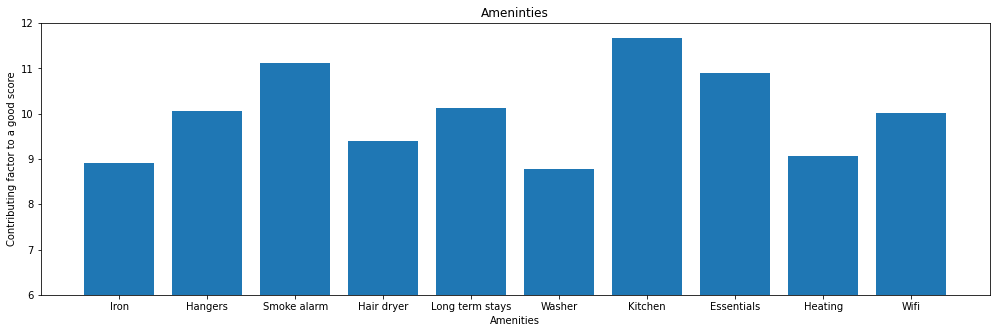

In [52]:
fig = plt.figure(figsize=(17, 5))
plt.ylim(6,12)
plt.bar(newDict, feature_importance)
plt.xlabel('Amenities')
plt.ylabel('Contributing factor to a good score')
plt.title('Ameninties')
plt.show()